**Walmart - Confidence Interval and CLT**

***About Walmart:***

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

***Business Problem:***

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

***Understanding the Dataset:***

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation(Masked)
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category (Masked)
- Purchase: Purchase Amount

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O 'Walmart.csv'

--2024-04-10 08:13:06--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.210, 18.172.139.61, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘Walmart.csv’

Walmart.csv         100%[===================>]  21.96M  7.40MB/s    in 3.0s    

2024-04-10 08:13:10 (7.40 MB/s) - ‘Walmart.csv’ saved [23027994/23027994]



In [3]:
#Importing Necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import poisson

In [4]:
df=pd.read_csv('Walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns:{df.shape[1]}")

Number of rows: 550,068 
Number of columns:10


In [6]:
#Checking for Null or missing values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
#Checking for duplicate values:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

Observation: No Null Values or Duplicate values

In [8]:
#Checking the count of unique values in each column in the dataset:
df.nunique().sort_values(ascending=False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

Basic Information of the given Walmart Dataset: Exploratory analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
#Changing the datatype of User_ID, Product_ID, Gender, Age, City_Category, Marital_Status to category since they have categorical values:
columns = ['User_ID','Product_ID','Gender','Age','City_Category','Marital_Status']
df[columns] = df[columns].astype('category')
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [11]:
df.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


Observations and Insights:

1. There are 5891 unique users. User ID 1001680 is the Top customer as per the given dataset, with more than 1000 shopping times.
2. There are 3631 unique products at Walmart as per given dataset. Product ID P00265242 is the most frequent sold product.
3. Men are more frequent buyers than women at Walmart with around 75% of the shopping done.
4. Shoppers are binned into 7 age categories. The most frequent buyers are of the age group 26-35.
5. There are 3 different city categories, City categiry B being the top of Walmart shopping experience.
6. 35% shoppers are staying in the current city since 1 year.
7. 59% of Walmart Shoppers are not married.

##Univariate Analysis:

<Axes: xlabel='Purchase', ylabel='Count'>

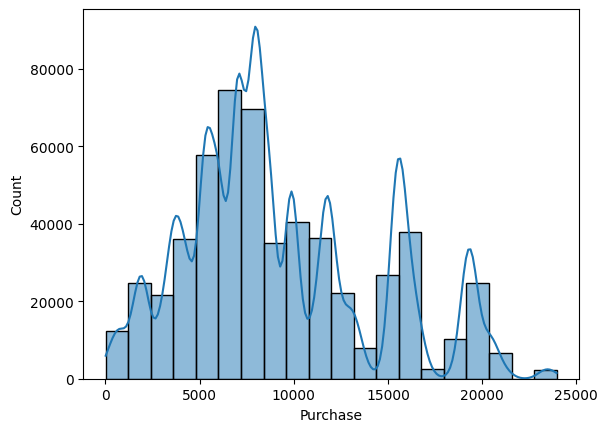

In [12]:
sns.histplot(data=df['Purchase'],bins=20,kde=True)

<Axes: xlabel='Purchase'>

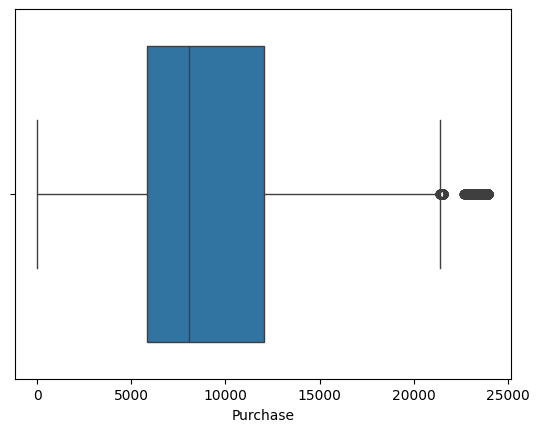

In [13]:
sns.boxplot(x = df['Purchase'],vert = False,patch_artist = True)

In [14]:
iqr1=df['Purchase'].quantile(0.75)-df['Purchase'].quantile(0.25)
upper_limit=df['Purchase'].quantile(0.75) + 1.5*iqr1
upper_limit

21400.5

Observations:

As seen above, Purchase amount over 21400.5 is considered as outlier. We will count the number of outliers as below.

In [15]:
len(df.loc[df['Purchase'] > 21400.5,'Purchase'])

2677

In [16]:
len(df.loc[df['Purchase'] > 21400.5,'Purchase'])/ len(df['Purchase'])

0.004866671029763593

There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount

##Categorical Variables

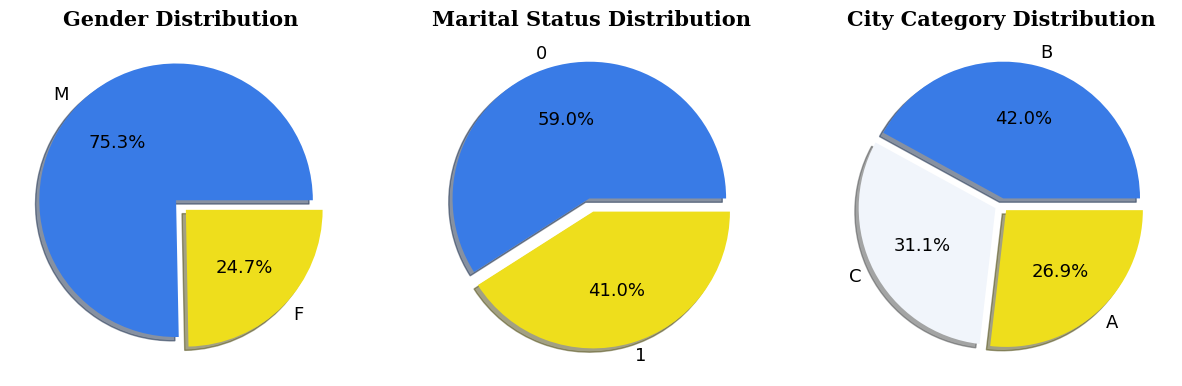

In [17]:
#setting the plot style
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(1,3)
 # creating pie chart for gender disribution
ax0 = fig.add_subplot(gs[0,0])
color_map = ["#397BE6", "#EEDE1C"]
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%', explode=(0.05,0.05),
 shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})
 # creating pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])
color_map = ["#397BE6", "#EEDE1C"]
ax1.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',explode=(0.05,0.05),
 shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})
 # creating pie chart for city category
ax1 = fig.add_subplot(gs[0,2])
color_map = ["#397BE6", "#F1F5FB",'#EEDE1C']
ax1.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = '%.1f%%',explode=(0.05,0.05,0.05),
 shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax1.set_title('City Category Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()


###Insights
1. Gender Distribution - There is a significant difference in purchase behavior of men and women during the Black Friday event at Walmart.
2. Marital Status - Unmarried customers account for higher shopping and purchases, Walmart can do a targeted marketing for Singles group to attract them with more and more offers and discounts.
3. City Category - City Category B saw the most number of transactions followed by City Category C and City Category A respectively.

Customer Age Distribution:

<ipython-input-18-9cb53e39d7e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agegroup.index,y=agegroup.values,palette='rainbow')


<Axes: xlabel='Age'>

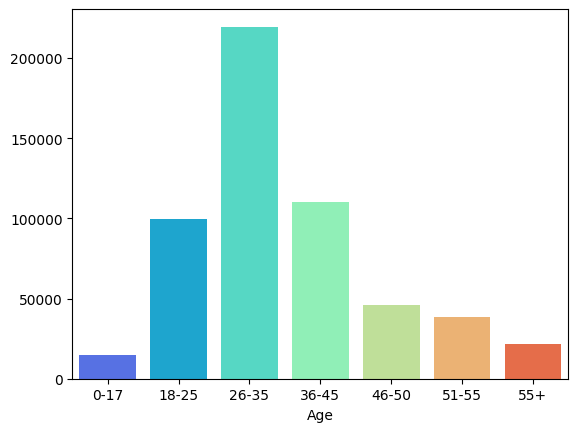

In [18]:
agegroup = df['Age'].value_counts()
sns.barplot(x=agegroup.index,y=agegroup.values,palette='rainbow')

Majority of the customers belong to 26-35, followed by 36-45 and then 18-25 age groups. This might be because the consumers falling under age group 18 to 45 are the people who are wokring and earning at their most compared to other groups.

Walmart can offer discounts to other groups to encourage more shopping and attract to strengthen their shopper base.

Customers - Staying in their current city distribution

<ipython-input-19-3d4e2e4780ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=citystay.index,y=citystay.values,palette='Paired')


<Axes: xlabel='Stay_In_Current_City_Years'>

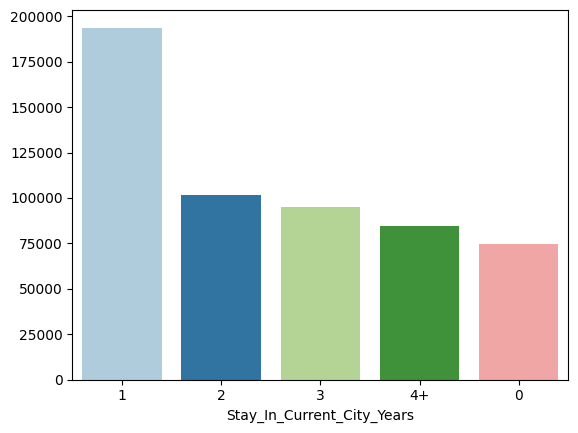

In [19]:
citystay = df['Stay_In_Current_City_Years'].value_counts()
sns.barplot(x=citystay.index,y=citystay.values,palette='Paired')

New comers into the city, who have stayed for 1 year are the majority of Walmart's customer, but people who have stayed for 4+ years are around 15% of total customer base.

Walmart is doing good at attracting new comers already, should focus on loyalty programs and retaining customers who are in the city for long for greater profits and sustainability.

## Bivariate Analysis:

Exploring Purchase patterns:


<Axes: xlabel='Product_Category', ylabel='Count'>

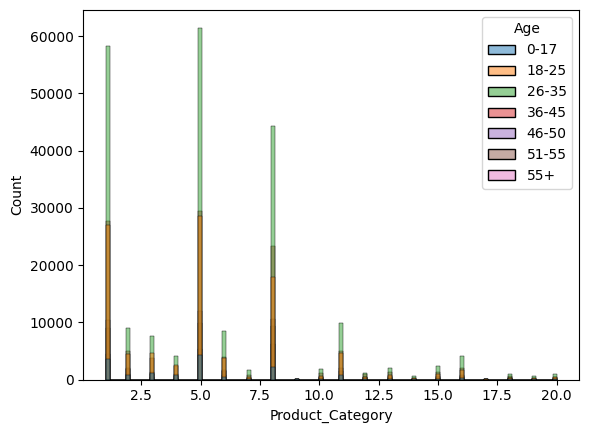

In [20]:
sns.histplot(data=df,x=df['Product_Category'],hue=df['Age'])

<ipython-input-21-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-21-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-21-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-21-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigni

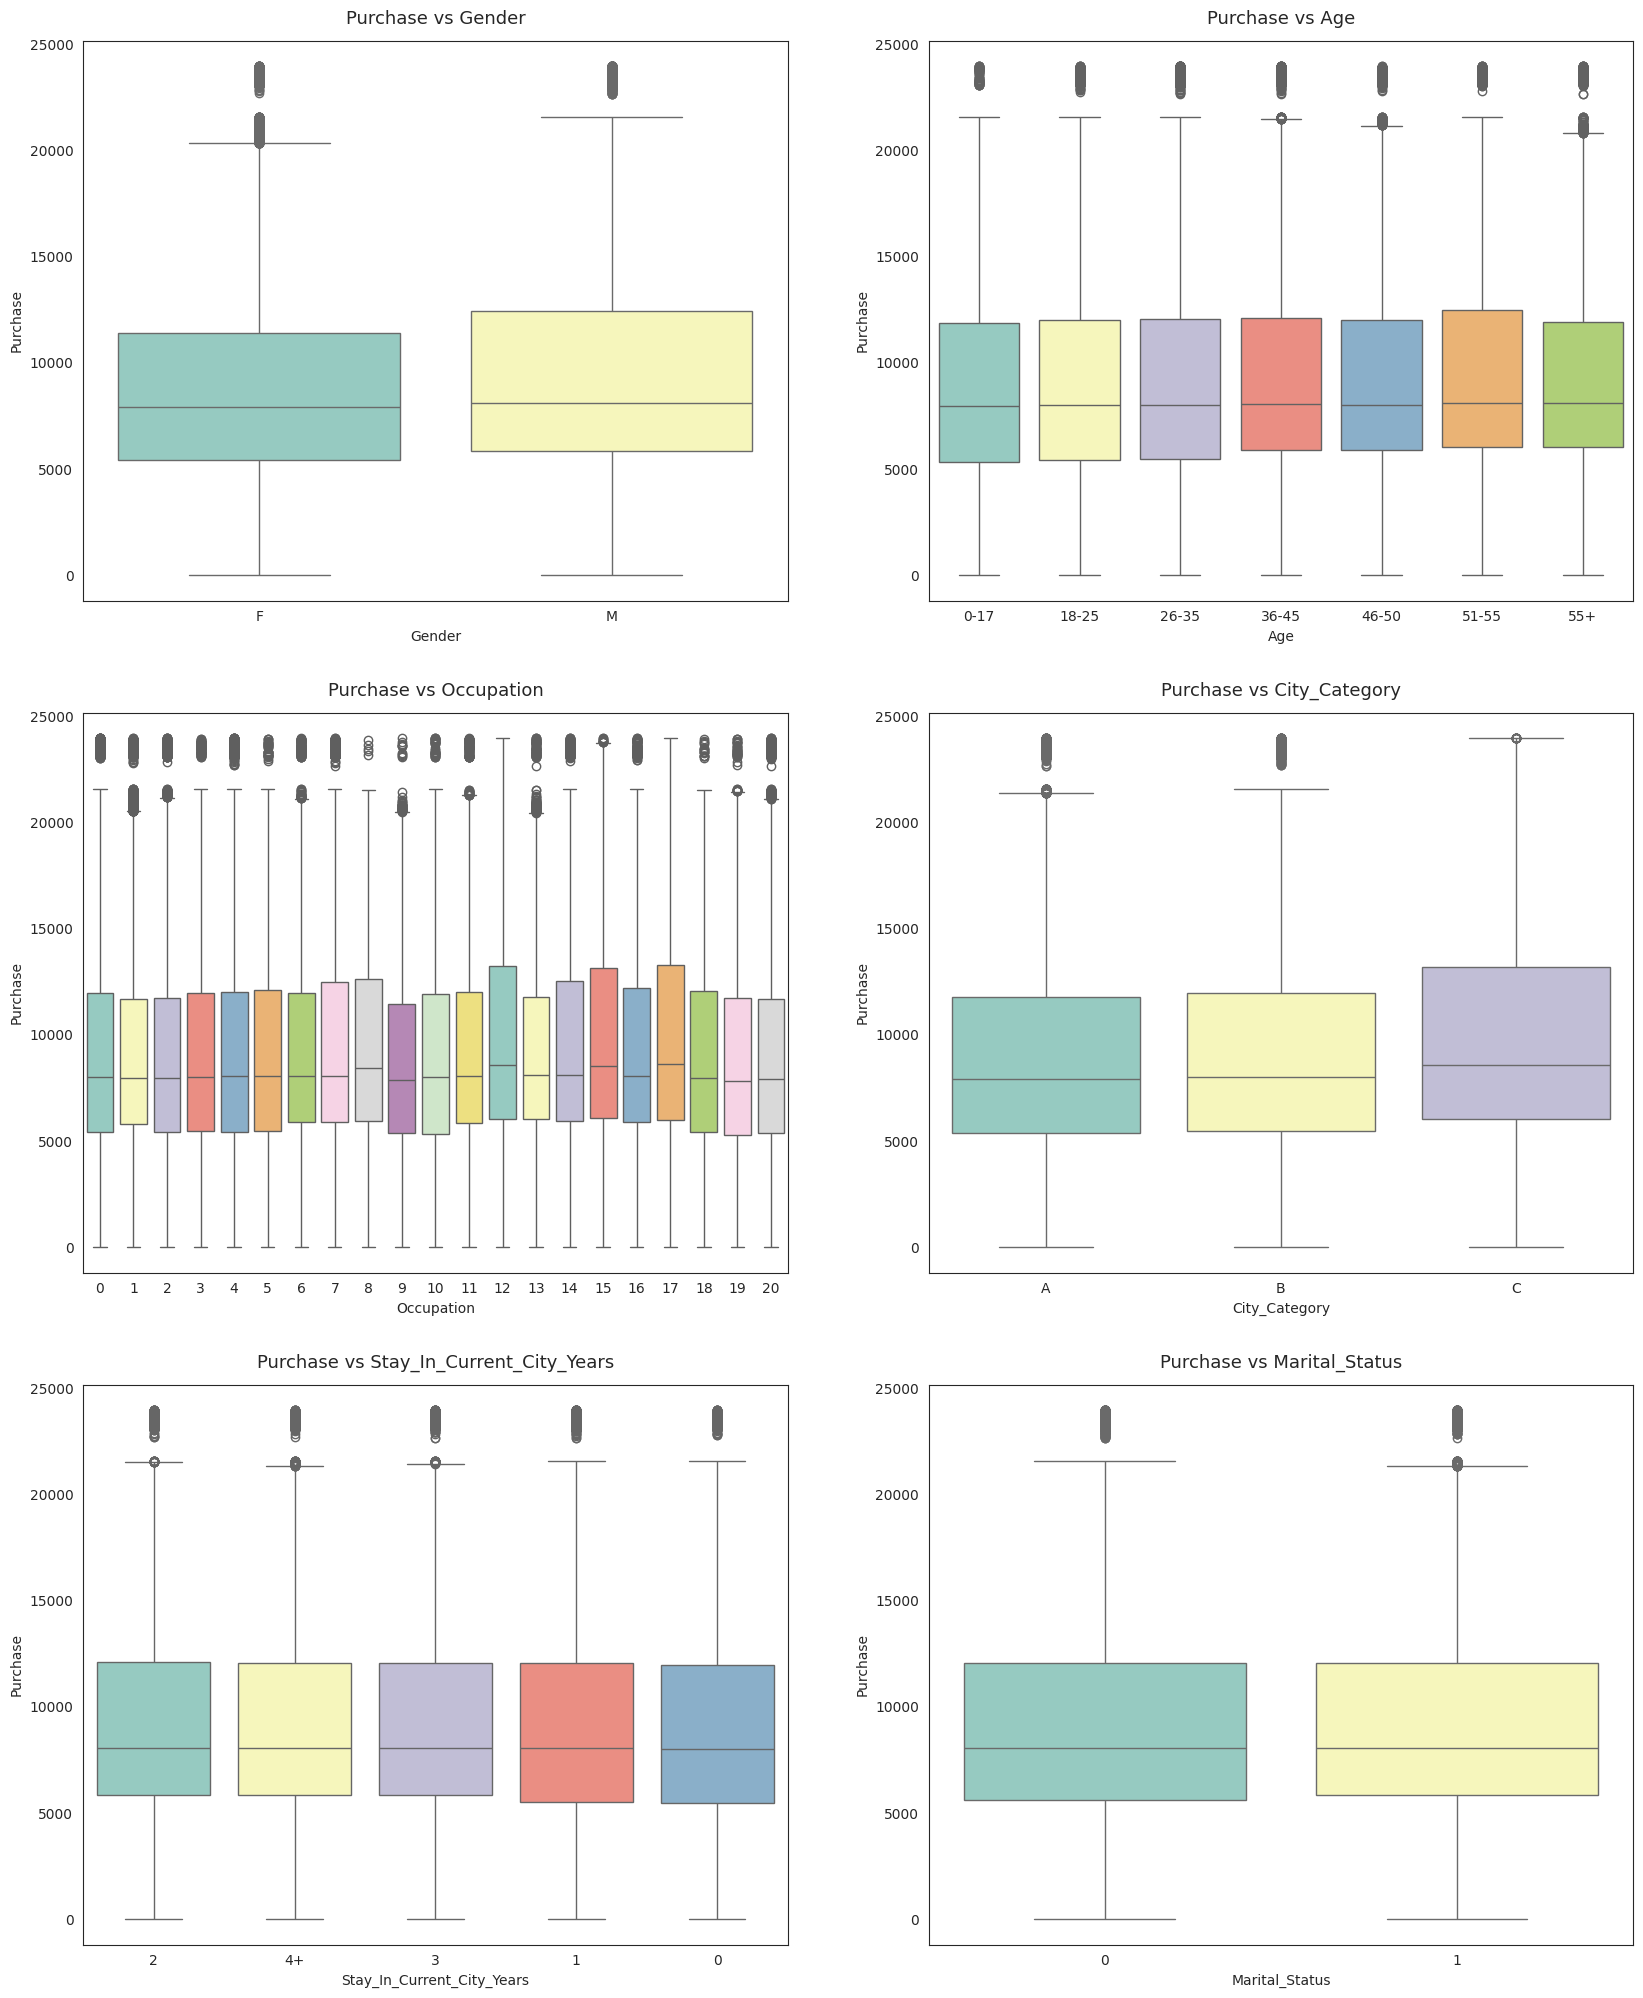

<ipython-input-21-8c207d598a9a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')


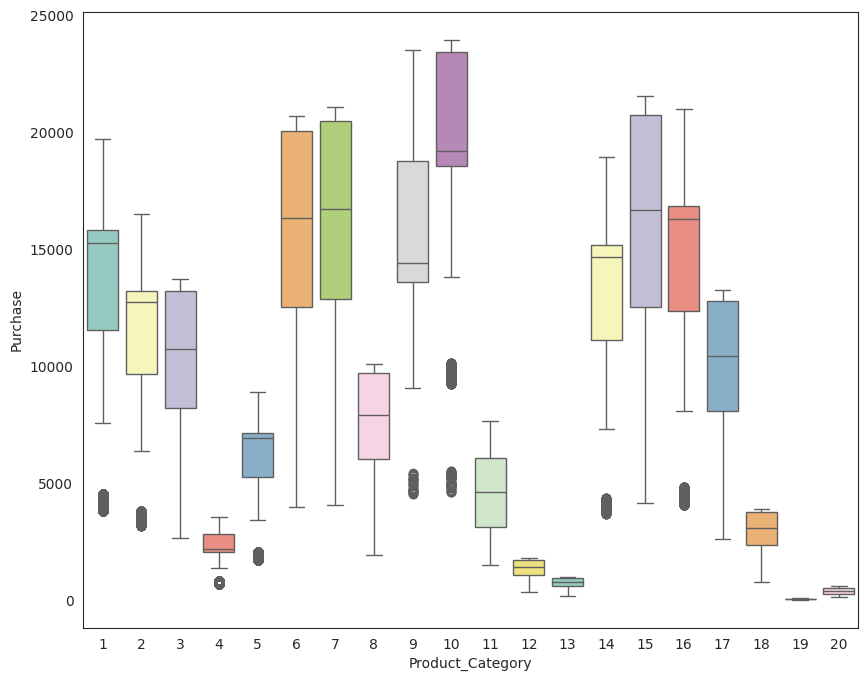

In [21]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

##Multivariate Analysis

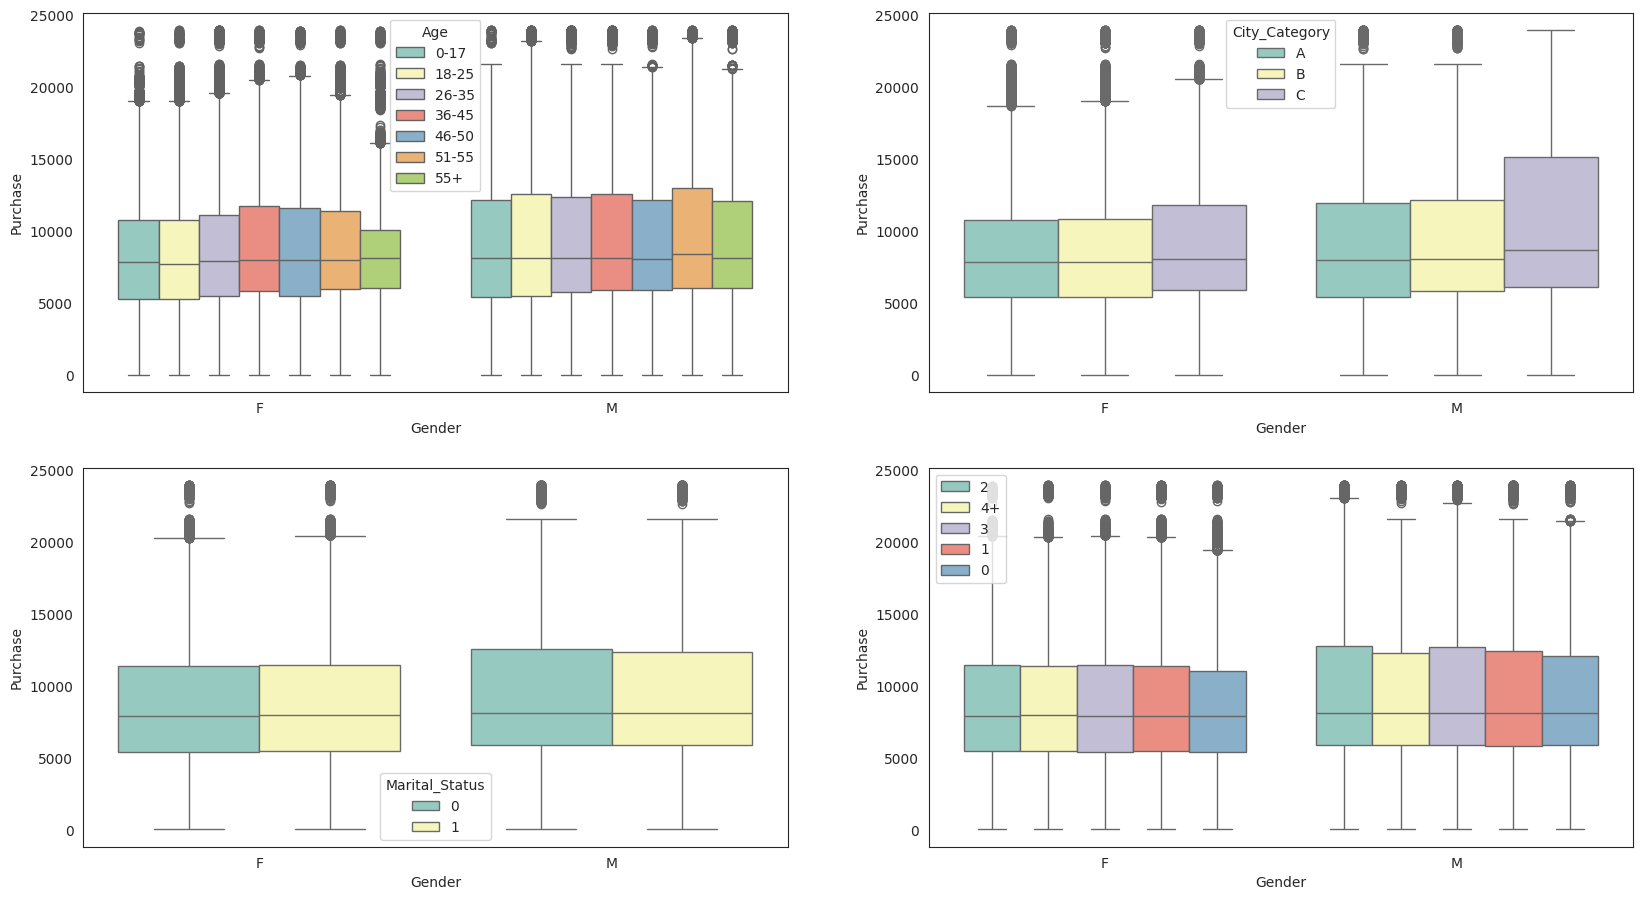

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [23]:
pd.crosstab(index=df['Product_Category'],columns=df['Age'],margins=True,normalize=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,0.006517,0.049016,0.105894,0.050263,0.019041,0.016451,0.008019,0.255201
2,0.001463,0.008050,0.016231,0.008930,0.003827,0.003238,0.001645,0.043384
3,0.002182,0.008563,0.013929,0.007006,0.002502,0.001680,0.000885,0.036746
4,0.001378,0.004478,0.007621,0.004279,0.001800,0.001233,0.000578,0.021366
5,0.007872,0.051852,0.111755,0.053406,0.021763,0.017985,0.009757,0.274390
6,0.000725,0.006816,0.015425,0.007088,0.002949,0.002636,0.001567,0.037206
7,0.000096,0.000874,0.003001,0.001471,0.000594,0.000484,0.000244,0.006765
8,0.004105,0.032561,0.080456,0.042351,0.019372,0.016980,0.011286,0.207111
9,0.000029,0.000115,0.000280,0.000195,0.000060,0.000053,0.000015,0.000745


In [24]:
pd.crosstab(index=df['Product_Category'],columns=df['Gender'],margins=True,normalize=True)

Gender,F,M,All
Product_Category,,,
1,0.045142,0.210059,0.255201
2,0.010286,0.033098,0.043384
3,0.010919,0.025828,0.036746
4,0.006616,0.014751,0.021366
5,0.076283,0.198106,0.274390
6,0.008288,0.028918,0.037206
7,0.001714,0.005050,0.006765
8,0.061007,0.146104,0.207111
9,0.000127,0.000618,0.000745


<Axes: xlabel='Product_Category', ylabel='Count'>

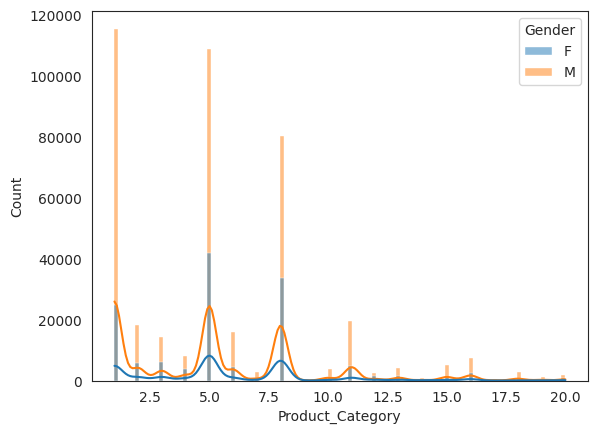

In [25]:
sns.histplot(x=df['Product_Category'],hue=df['Gender'],kde=True)

##How does gender affect the amount spent?

In [26]:
from scipy.stats import norm
import scipy.stats as stats

In [27]:
df_amount_males=df[df['Gender']=='M']['Purchase']
df_amount_females=df[df['Gender']=='F']['Purchase']

<Axes: xlabel='Purchase', ylabel='Count'>

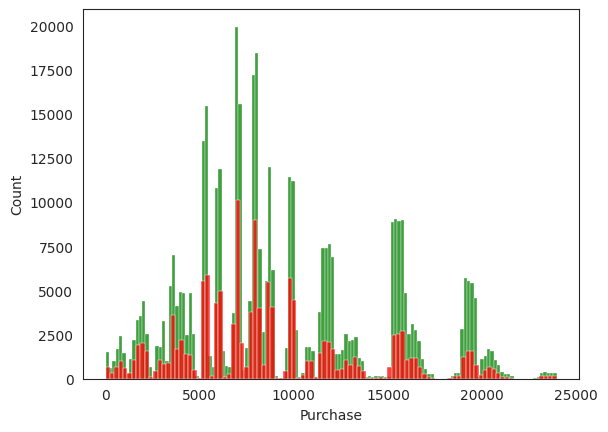

In [28]:
sns.histplot(df_amount_males,color='green')
sns.histplot(df_amount_females,color='red')

In [29]:
#calculating mean of purchase amounts for Males and Females:
mu_M=df_amount_males.mean()
mu_F=df_amount_females.mean()
print(mu_M,mu_F)

9437.526040472265 8734.565765155476


In [30]:
#calculating the standard deviation for purchase amounts for males and females:
sigma_M=df_amount_males.std()
sigma_F=df_amount_females.std()
print(sigma_M,sigma_F)

5092.18620977797 4767.233289291458


In [31]:
#Calculating the standard error:
df_amount_males.shape, df_amount_females.shape
se_M = round(sigma_M/(np.sqrt(df_amount_males.shape[0])),3)
se_F = round(sigma_F/(np.sqrt(df_amount_females.shape[0])),3)
se_M,se_F

(7.912, 12.936)

In [32]:
#95% confidence interval --> 5% significance level --> alpha = 0.05
#Since the test will be 2-tailed, alpha=0.025 on each side.

z=norm.ppf(0.025)
z

-1.9599639845400545

In [33]:
#The upper and lower limits of the confidence interval with 95% confidence -->
#Males:
(mu_M+(se_M*z),mu_M-(se_M*z))

(9422.018805426584, 9453.033275517946)

In [34]:
#Females:
(mu_F+(se_F*z),mu_F-(se_F*z))

(8709.211671051466, 8759.919859259486)

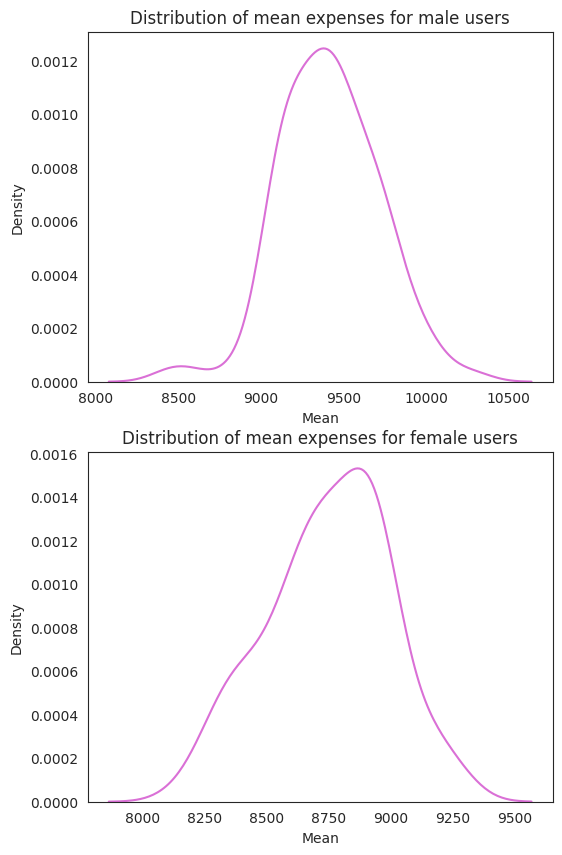

In [35]:
# Taking samples of 300 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in ['M','F']:
    means = []
    for i in range(100):
        temp = df.loc[df['Gender']==j,'Purchase'].sample(300)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 'M':
        gen = 'male'
        means_m = means
    else:
        gen = 'female'
        means_f = means
    plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

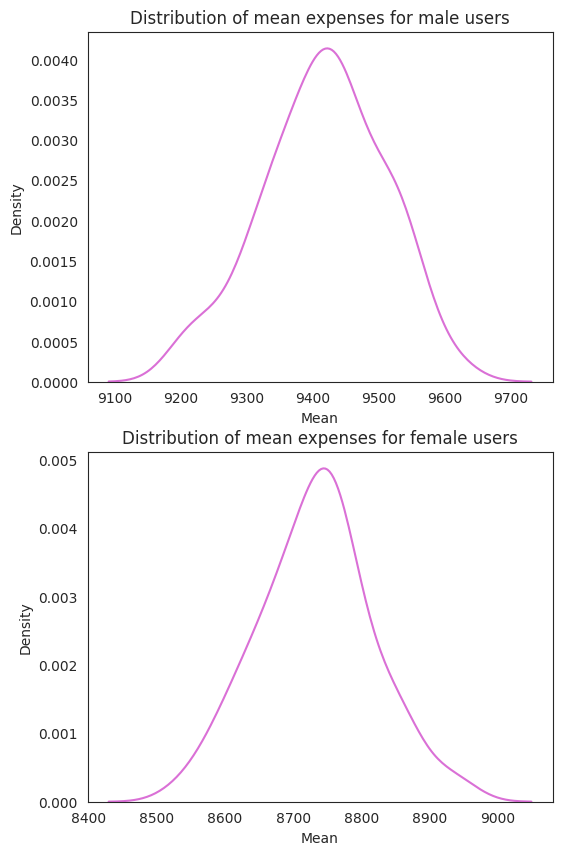

In [36]:
# Taking samples of 3000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in ['M','F']:
    means = []
    for i in range(100):
        temp = df.loc[df['Gender']==j,'Purchase'].sample(3000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 'M':
        gen = 'male'
        means_m = means
    else:
        gen = 'female'
        means_f = means
    plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

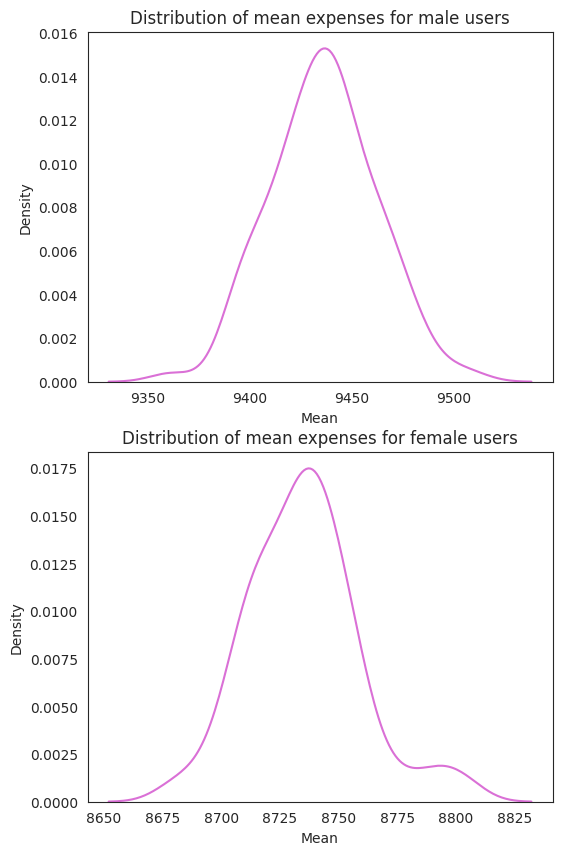

In [37]:
# Taking samples of 30000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in ['M','F']:
    means = []
    for i in range(100):
        temp = df.loc[df['Gender']==j,'Purchase'].sample(30000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 'M':
        gen = 'male'
        means_m = means
    else:
        gen = 'female'
        means_f = means
    plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()


In [38]:
# Finding different confidence intervals for males and females
for i in ['males', 'females']:
    print('For {g}-'.format(g = i))
    if i == 'males':
        means = means_m
        gen = 'M'
    else:
        means = means_f
        gen = 'F'
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Gender']==gen, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Gender']==gen, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For males-
Mean of sample means = 9436.389026333332
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 25.555243199321215
Standard deviation of population = 5092.18620977797
99% CONFIDENCE INTERVAL for mean expense by males users-
(9375.7, 9501.07)
95% CONFIDENCE INTERVAL for mean expense by males users-
(9392.71, 9481.62)
90% CONFIDENCE INTERVAL for mean expense by males users-
(9396.75, 9480.53)
--------------------------------------------------
For females-
Mean of sample means = 8735.023500333335
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 23.656269691784775
Standard deviation of population = 4767.233289291458
99% CONFIDENCE INTERVAL for mean expense by females users-
(8680.82, 8803.54)
95% CONFIDENCE INTERVAL for mean expense by females users-
(8693.45, 8793.06)
90% CONFIDENCE INTERVAL for mean expense by females users-
(8701.4, 8778.78)
--------------------------------------------------


Observations-

1. Mean purchase amount for females = 8734.56
2. Mean purchase amount for males = 9437.52
3. 95% confidence interval for purchase amounts of females is less than males without any intersection.
4. We can say with 95% confidence that females spend less than males.

Insights-

1. Ads for products which cost between 9151 and 9790 can be targetted towards males.
2. Ads for products which cost between 8507 and 9051 can be targetted towards females.

###Insights
1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence
intervals become narrower and more precise . In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.
3. Population Average

We are 95% confident that the true population average for males falls between $9,393 and $9,483 , and for females , it falls between $8,692  and
$8,777 .
4. Women spend less

Men tend to spend more money per transaction on average than women , as the upper bounds of the confidence intervals for men are consistently
higher than those for women across different sample sizes.
5. How can Walmart leverage this conclusion to make changes or improvements?

Segmentation Opportunities

Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.

Pricing Strategies

Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

##How does Marital_Status affect the amount spent?

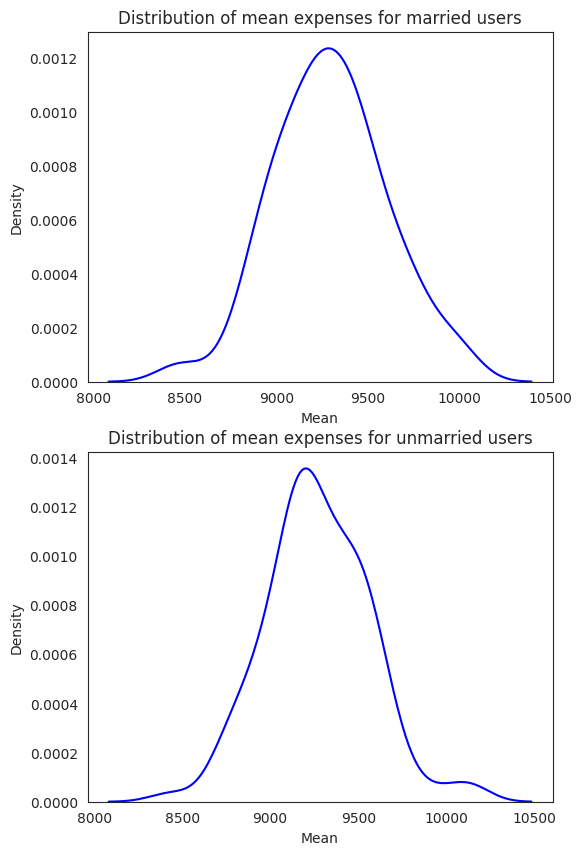

In [39]:
# Taking samples of 300 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(300)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'blue')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

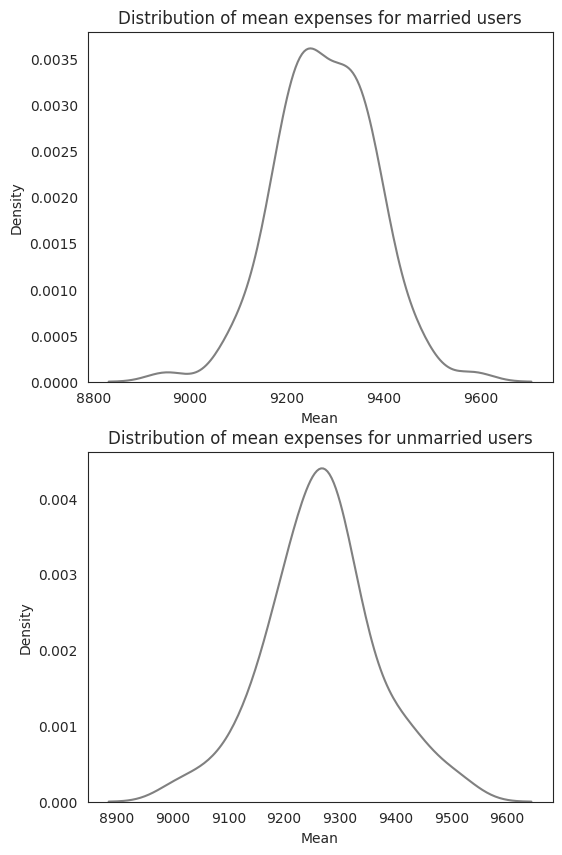

In [40]:
# Taking samples of 3000 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(3000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'grey')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

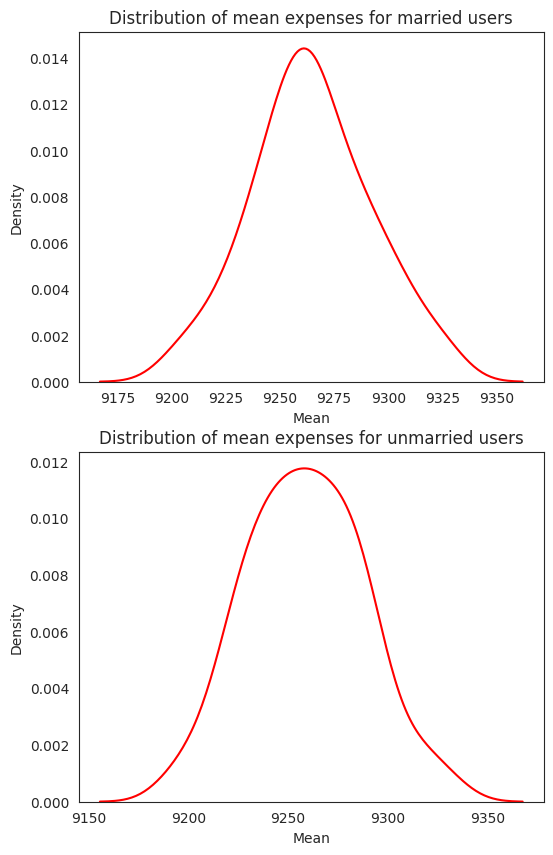

In [41]:
# Taking samples of 30000 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(30000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'red')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [42]:
# Finding different confidence intervals for mean expense by married and unmarried customers
for i in ['married', 'unmarried']:
    print('For {m}-'.format(m = i))
    if i == 'married':
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Marital_Status']==ms, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Marital_Status']==ms, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For married-
Mean of sample means = 9258.574187333334
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 29.290072922791047
Standard deviation of population = 5016.897377793055
99% CONFIDENCE INTERVAL for mean expense by married users-
(9193.17, 9329.79)
95% CONFIDENCE INTERVAL for mean expense by married users-
(9204.63, 9316.31)
90% CONFIDENCE INTERVAL for mean expense by married users-
(9213.98, 9305.95)
--------------------------------------------------
For unmarried-
Mean of sample means = 9264.476300666667
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 27.663698958956576
Standard deviation of population = 5027.347858674449
99% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9202.28, 9327.88)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9209.36, 9320.65)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9218.1, 9314.16)
--------------------------------------------------


Observations-

1. Mean expense by married customers is 9261.17
2. Mean expense by unmarried customers is 9265.90
3. There’s is overlap between 90%, 95% and 99% confidence intervals for both.
4. We don’t have enough statistical evidence to compare their expenses.

###Insights
1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence
intervals become narrower and more precise . In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically
significant difference between the average spending per transaction for married and unmarried customers within the given samples.
3. Population Average

We are 95% confident that the true population average for married customers falls between $9,217 and $9,305 , and for unmarried customers , it
falls between $9,222 and $9,311 .
4. Both the customers spend equal

The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a
similar amount per transaction . This implies a resemblance in spending behavior between the two groups.
5. How can Walmart leverage this conclusion to make changes or improvements?

Marketing Resources

Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

##How does Age affect the amount spent?

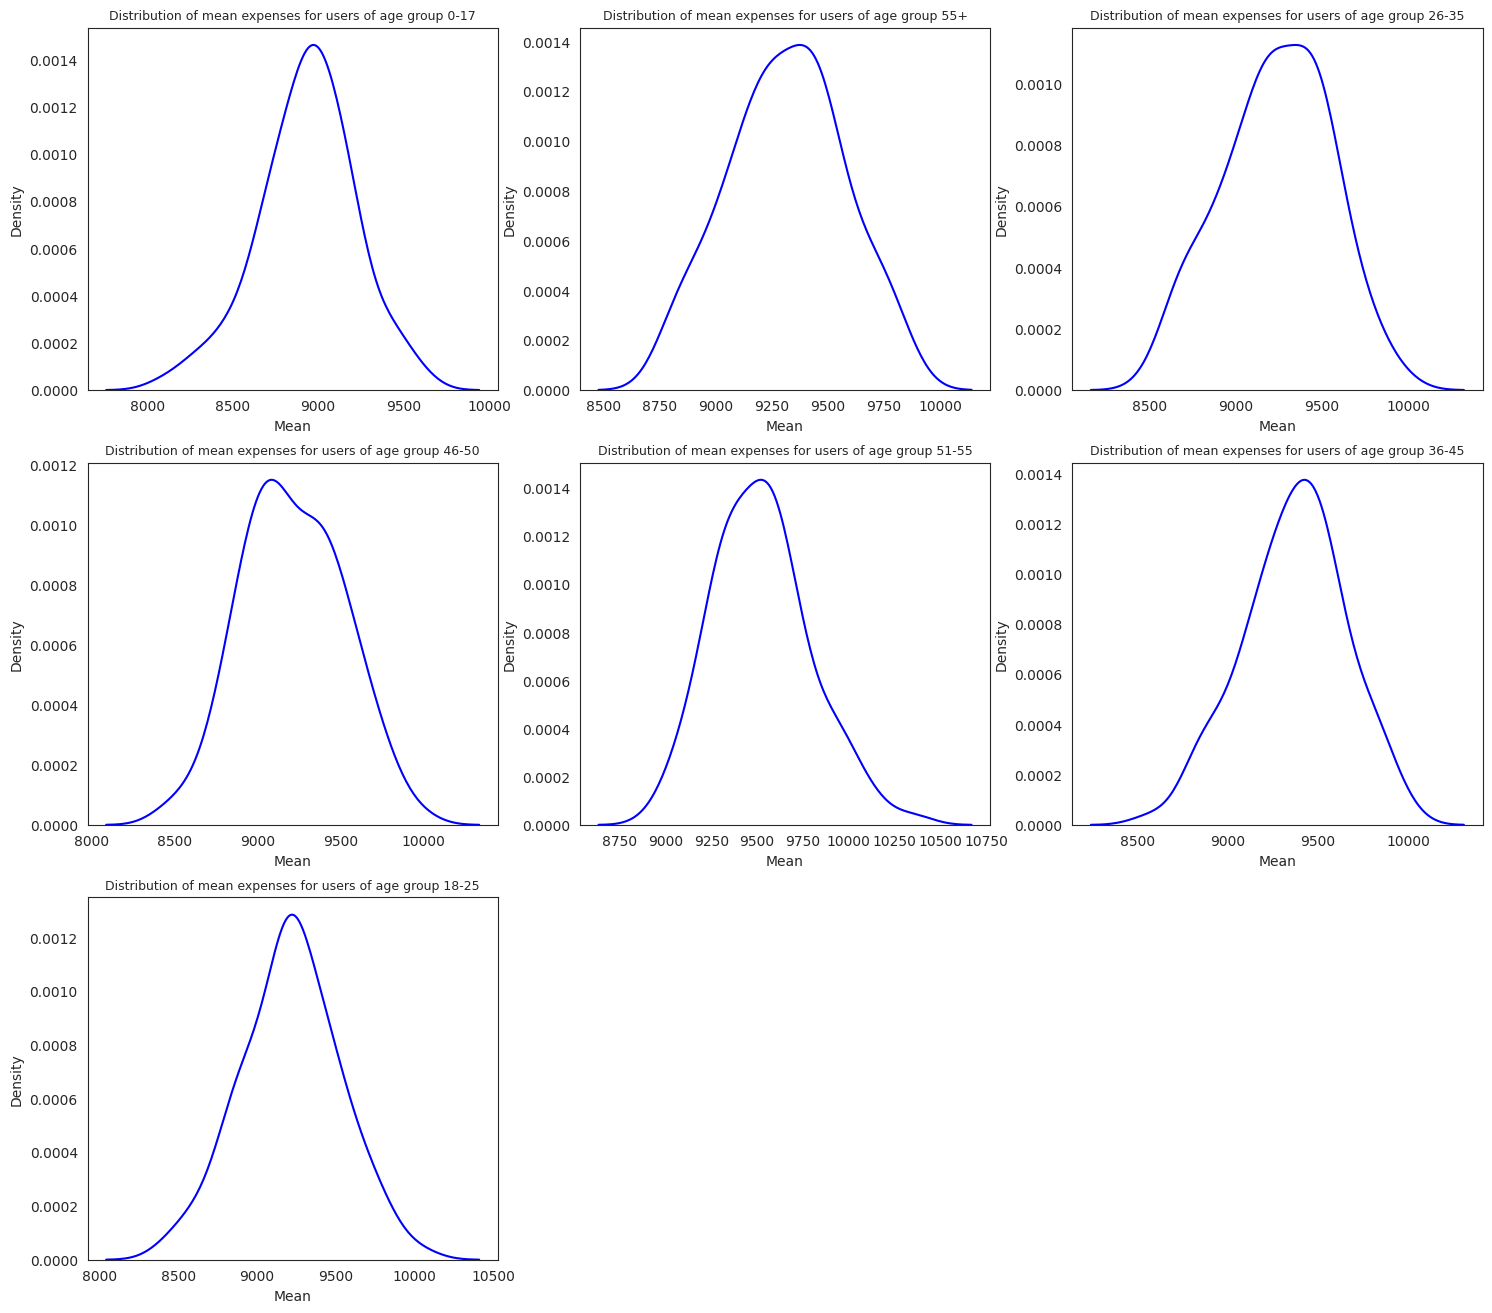

In [46]:
# Taking 100 samples of 300 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(18,16))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(300)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'blue')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=9)
    plt.xlabel('Mean')
    x += 1
plt.show()

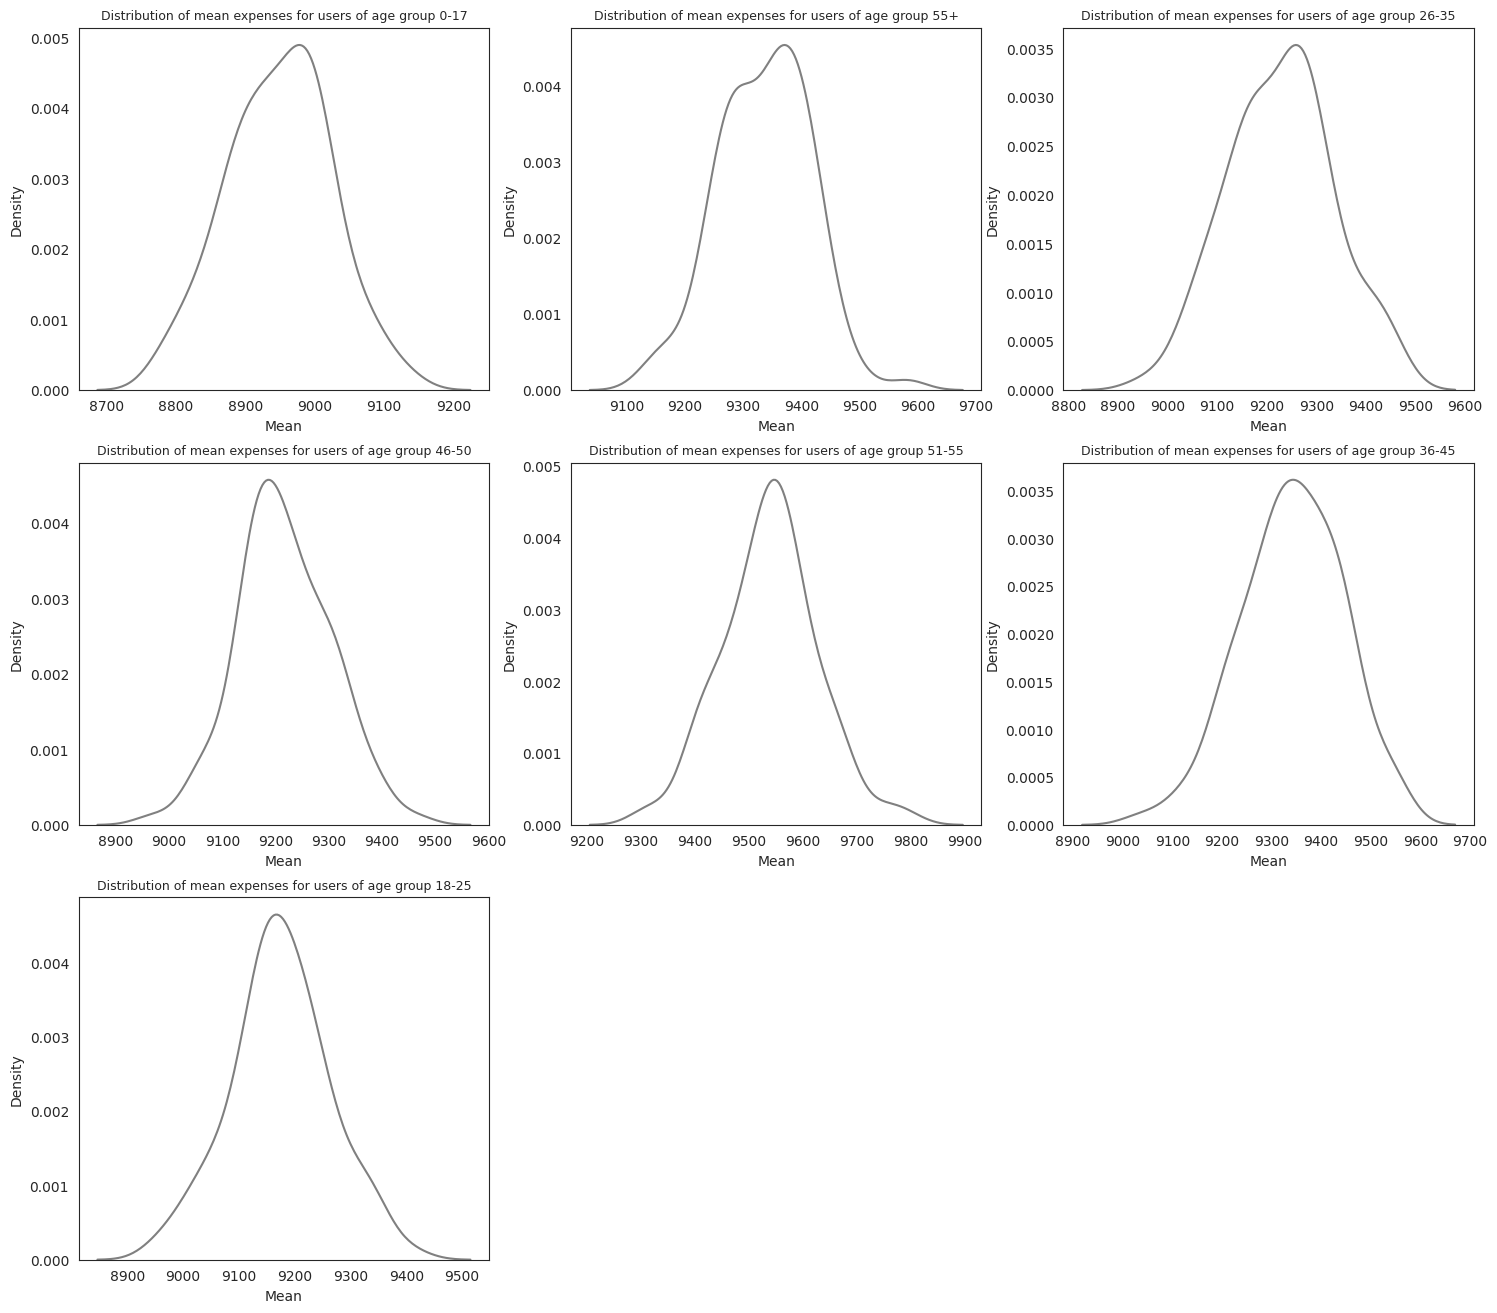

In [47]:
# Taking 100 samples of 3000 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(18,16))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(3000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'grey')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=9)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [53]:
#defining a function for plotting the visual for given confidence interval
def plot(ci):
  #setting the plot style
  fig = plt.figure(figsize = (15,15))
  gs = fig.add_gridspec(3,1)
 #creating separate data frames

  df_1 = df.loc[df['Age'] == '0-17','Purchase']
  df_2 = df.loc[df['Age'] == '18-25','Purchase']
  df_3 = df.loc[df['Age'] == '26-35','Purchase']
  df_4 = df.loc[df['Age'] == '36-45','Purchase']
  df_5 = df.loc[df['Age'] == '46-50','Purchase']
  df_6 = df.loc[df['Age'] == '51-55','Purchase']
  df_7 = df.loc[df['Age'] == '55+','Purchase']

 #sample sizes and corresponding plot positions
  sample_sizes = [(300,0),(3000,1),(30000,2)]
 #number of samples to be taken from purchase amount
  bootstrap_samples = 20000
  samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

  for i,x in sample_sizes:
    l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]
    for j in range(bootstrap_samples):

      #creating random 5000 samples of i sample size
      bootstrapped_samples_1 = np.random.choice(df_1,size = i)
      bootstrapped_samples_2 = np.random.choice(df_2,size = i)
      bootstrapped_samples_3 = np.random.choice(df_3,size = i)
      bootstrapped_samples_4 = np.random.choice(df_4,size = i)
      bootstrapped_samples_5 = np.random.choice(df_5,size = i)
      bootstrapped_samples_6 = np.random.choice(df_6,size = i)
      bootstrapped_samples_7 = np.random.choice(df_7,size = i)
 #calculating mean of those samples
      sample_mean_1 = np.mean(bootstrapped_samples_1)
      sample_mean_2 = np.mean(bootstrapped_samples_2)
      sample_mean_3 = np.mean(bootstrapped_samples_3)
      sample_mean_4 = np.mean(bootstrapped_samples_4)
      sample_mean_5 = np.mean(bootstrapped_samples_5)
      sample_mean_6 = np.mean(bootstrapped_samples_6)
      sample_mean_7 = np.mean(bootstrapped_samples_7)

 #appending the mean to the list
      l1.append(sample_mean_1)
      l2.append(sample_mean_2)
      l3.append(sample_mean_3)
      l4.append(sample_mean_4)
      l5.append(sample_mean_5)
      l6.append(sample_mean_6)
      l7.append(sample_mean_7)
 #storing the above sample generated
    samples1[f'{ci}%_{i}'] = l1
    samples2[f'{ci}%_{i}'] = l2
    samples3[f'{ci}%_{i}'] = l3
    samples4[f'{ci}%_{i}'] = l4
    samples5[f'{ci}%_{i}'] = l5
    samples6[f'{ci}%_{i}'] = l6
    samples7[f'{ci}%_{i}'] = l7

 #creating a temporary dataframe for creating kdeplot
    temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})
 #plotting kdeplots
 #plot position
    ax = fig.add_subplot(gs[x])

 #plots
    for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'), ('#7A9D54', '51-55'),('#9EB384', '55+')]:

      sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)
 #removing the axis lines
    for s in ['top','left','right']:
      ax.spines[s].set_visible(False)
 # adjusting axis labels
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
 #setting title for visual
    ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})
    plt.legend()

 #setting title for visual
  fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')
  plt.show()

  return samples1,samples2,samples3,samples4,samples5,samples6,samples7


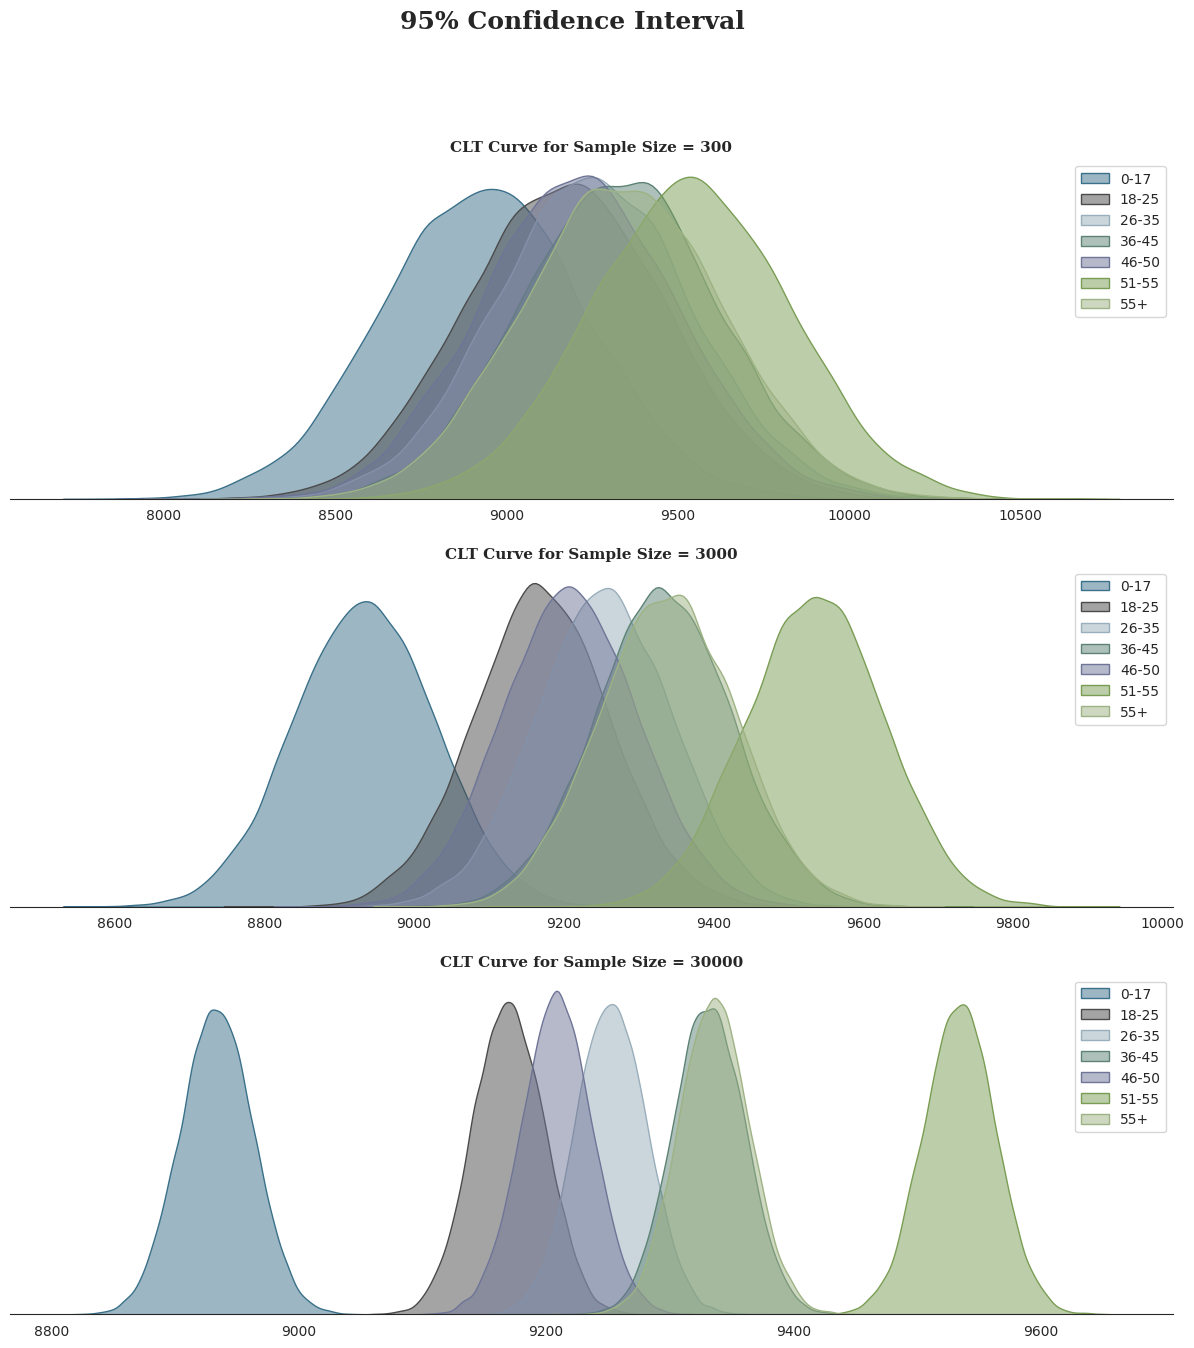

In [54]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

In [50]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For 0-17-
Mean of sample means = 8948.909286666667
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 74.40598507709838
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8782.04, 9124.93)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8801.14, 9085.16)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8821.48, 9076.93)
--------------------------------------------------
For 55+-
Mean of sample means = 9336.54256
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 78.98940509941652
Standard deviation of population = 5011.4939956034605
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9145.72, 9544.63)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9166.18, 9467.9)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9214.09, 9451.01)
-----------------------

Observations-

1. 99% Confidence Interval for 0–17 is less than 51–55 without overlap.
2. We can say with 99% confidence that expense of 0–17 is less compared to expense of 51–55 ages.

Insights-

1. Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.
2. Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.

##Insights
1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence
intervals become narrower and more precise . In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals and customer spending patterns

From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age
groups -

0 - 17 - Customers in this age group have the lowest spending per transaction
18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics

36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns

51 - 55 - Customers in this age group have the highest spending per transaction
3. Population Average

We are 95% confident that the true population average for following age groups falls between the below range -
- 0 - 17 = $ 8,888 to 8,979

- 18 - 25 = $ 9,125 to 9,213

- 26 - 35 = $ 9,209 to 9,297

- 36 - 45 = $ 9,288 to 9,376

- 46 - 50 = $ 9,165 to 9,253

- 51 - 55 = $ 9,490 to 9,579

- 55+ = $ 9,292 to 9,381
4. How can Walmart leverage this conclusion to make changes or improvements?

Targeted Marketing

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group

Customer Segmentation

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

##Insights and Recommendations

###Insights-

1. Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.
2. Ads can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
3. Ads can be targeted towards people of city category B. Inventory in these cities can be replenished.
4. Ads can be targeted towards people who have spent between 1 to 2 years in their cities.
5. Ads can be targeted towards unmarried people.
6. Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.
7. Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.
8. More products popular among people with occupations 0, 4 and 7 can be kept in store.
9. Ads for slightly expensive products can be targetted towards people with occupation 12 and 17. (See median expenses of all occupations below)
10. Ads for products which cost between 9151 and 9790 can be targetted towards males.
11. Ads for products which cost between 8507 and 9051 can be targetted towards females.
12. Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.
13. Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.

###Recommendations-

1. Target Male Shoppers

Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing
strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.
2. Focus on 26 - 45 Age Group

With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could
include offering exclusive deals on products that are popular among this age group.
3. Engage Younger Shoppers

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them
more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.
4. Customer Segmentation

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize
its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
5. Enhance the 51 - 55 Age Group Shopping Experience

Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide
personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 -
55 age group.
6. Post-Black Friday Engagement

After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase
customer retention and encourage repeat business throughout the holiday season and beyond.
